# Build the Weather Stations dataset

In [1]:
# Load my_utils.ipynb in Notebook
from ipynb.fs.full.my_utils import *

Opening connection to database
Add pythagore() function to SQLite engine
Fraction of the dataset used to train models: 10.00%
my_utils library loaded :-)


Looking at the NYC Weather Dataset, I've found that it contains measures for a total of 83 weather stations around New-York City.

Those weather stations are identified by their *NAME*, *STATION* (their id), *LATITUDE*, *LONGITUDE*, and *ELEVATION*

Looking at the *weather* dataset, I've found that one of those 83 station does not have any value in *ELEVATION.


In [2]:
# Load 'weather' dataset, limit column to station, name, latitude, longitude and elevation
nyc_stations=load_csv('weather')[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']]

# Remove line with empty elevations (this column is not always filled in)
print("Numer of stations without elevation:")
nyc_stations[nyc_stations.ELEVATION.isna()].drop_duplicates()


Numer of stations without elevation:


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
2791,US1NJES0020,"BLOOMFIELD 1.7 S, NJ US",40.785,-74.1885,NaN


To solve this, I've search on [Elevation Finder](https://www.freemaptools.com/elevation-finder.htm) website the value I should use in this missing *ELEVATION* feature. This gives me 40 meters for latitude 40.785 and longitude -741885.

Let's use the *fillna()* method on the *ELEVATION* columns to replace NaN values (which again are related to only one of the weather station) with the value *40*

> Note: Prior to the *fillna()* method call, I will drop duplicates from the dataset. The interesting thing here is to build a dataset with the weather stations static dataset.

In [3]:
US1NJES0020_ELEVATION=40

# Drop duplicates from nyc_stations dataset
nyc_stations.drop_duplicates(inplace=True)

# fillna() values in ELEVATION with 40 (the missing elevation value)
nyc_stations['ELEVATION']=nyc_stations['ELEVATION'].fillna(US1NJES0020_ELEVATION)
print("List of stations without elevation:",nyc_stations[nyc_stations.ELEVATION.isna()]['STATION'].count())


List of stations without elevation: 0


Now that our stations static dataset is cleaned, let's save it in our SQLite database, it will be usefull when we will need to reuse it.

> Note 1: now that this data will be made available in our database, I've added a new function in *my_utils* library: *get_stations()* which returns the *weather_stations* dataset stored in the Database.


In [4]:
# Verify SQL tablename is defined in my_utils library
print("Table name used to save this dataset:", STATION_TABLENAME)

Table name used to save this dataset: stations


In [5]:
# Save weather station dataset to SQL Database 
save_sql(nyc_stations, STATION_TABLENAME)

Saving OK


True

In [6]:
# Display stations dataset information to validate that
# it contains data for the 83 stations, data taken from SQL Database
stations=load_sql(STATION_TABLENAME)
stations.describe()

Query: SELECT * FROM stations


,LATITUDE,LONGITUDE,ELEVATION
count,83.000000,83.000000,83.000000
mean,40.758148,-74.122859,47.293976
std,0.207156,0.277533,44.306354
min,40.275368,-74.482746,2.100000
25%,40.656987,-74.316848,16.500000
50%,40.772892,-74.192680,28.000000
75%,40.906158,-74.000878,71.750000
max,41.083546,-73.373090,188.700000


# A bit of fun :-)

What about trying to draw the weather stations locations on a New-York City map ?

I'll use the *draw_nyc_map()* function from *my_utils* library to draw the NYC map. This drawing function accept latitude and longitude datapoints to be plotted on the map.

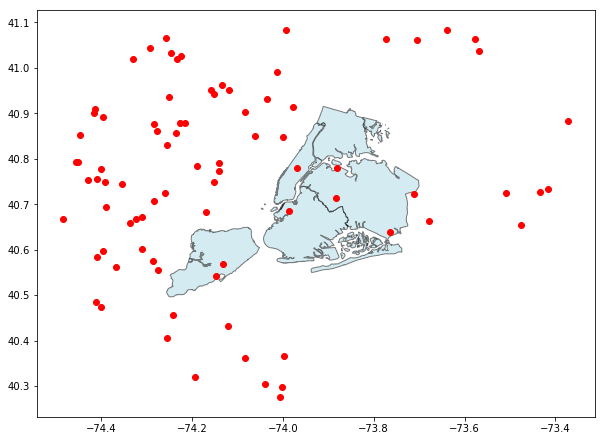

In [7]:
# Draw NYC map with weather stations
draw_nyc_map(latitude=stations['LATITUDE'], longitude=stations['LONGITUDE'])


# That's it

Even if this Notebooks is very short, it let me build a dataset of static weather stations features.

Let's follow up with the next notebook: [NYC Taxi Travel Data Preparation](12.NYC%20Taxi%20Travel%20Data%20Preparation.ipynb)